<a href="https://colab.research.google.com/github/afifrizkyandika11551100310/APRIL_DATA_SCIENTIST_ASSIGNMENT_M-Afif-Rizky-A/blob/main/Ingredients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Scientist_APRIL_Assignment**
**Name** : M Afif Rizky A <br>
**Email** : afifrizky933@gmail.com / 23521034@std.stei.itb.ac.id 

Analytics Skills **Evaluation Requirement**:
*	Q1 & Q2 are mandatory, Q3 is bonus if attempted.
*	Do the analytics in cloud where possible (free trial versions).
*	Other methods are also acceptable.
*	Do include documentations

**A customer** informed their consultant that they have **developed several formulations of petrol that gives different characteristics of burning pattern**. The formulations are **obtaining by adding varying levels of additives** that, for example, **prevent engine knocking**, **gum prevention**, **stability** in storage, and etc. However, a third party certification organisation **would like to verify if the formulations are significantly different**, and request for both physical and **statistical proof**. Since the formulations are confidential information, they are not named in the dataset

## **Q1**
**A descriptive analysis of the additives** (columns named as “a” to “i”), which **must include summaries of findings** (**parametric/non-parametric**). **Correlation and ANOVA**, if applicable, is a must

### **Library and Data Dependency**

In [ ]:
pip install pycaret

In [ ]:
pip install Jinja2

In [ ]:
pip install markupsafe==2.0.1

In [3]:
# library
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import heatmap
import missingno as msno
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import mannwhitneyu
from scipy.stats import normaltest
from pycaret.classification import *
from pycaret.clustering import *

In [4]:
# read dataset
data = pd.read_csv('ingredient.csv')
data.head(3)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03


This dataset contains formulation with variying levels of additive that have different characteristics burning pattern. to prevent any bias that can lead to misleading descriptive statistical proof, there are steps that must be done.

### **Dataset Composition Analysis**

Once we have the data, we need to ensure that it is in a format that we can use to analize any useful information from the data 

In [5]:
# Dimension Anlaysis
print('Dataset Dimension =', data.shape)

Dataset Dimension = (214, 9)


In [6]:
# Checking Data Types
data.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

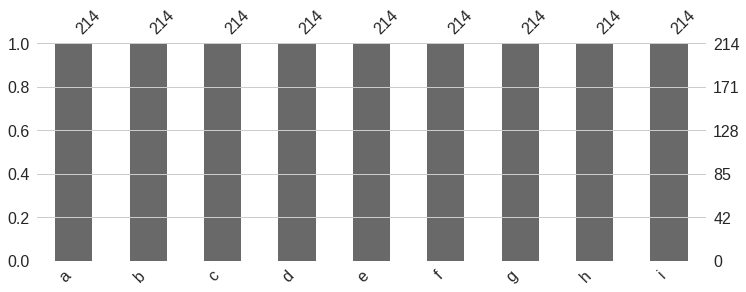

In [7]:
# Checking Missing Values
ax = msno.bar(data, figsize=(12,4))

Judging from the dimensions of the dataset used, it can be assumed that this is just a sample of several formulas developed by the customer. As we can see **all of data type are equal**, and **there are no missing value** from any columns from the data. from this quick analysis, **the data** that we use for analysis **is clean** 

### **Desriptive Analysis**

Descriptive Analysis is the type of analysis of data that helps describe, show or summarize data points in a constructive way such that patterns might emerge that fulfill every condition of the data. two **main approach** we will use for this data:
1.   The **quantitative approach** describes and summarizes data numerically
2.   The **visual approach** illustrates data with charts, plots, histograms, and other graphs.<br>
for descriptive analysis the **main method** we will use:
*   **univariate** analysis, about how to describe and summarize a single variable
*   **bivariate** analysis, about how to see statistical relationship among pair of variable
*   **multivariate** analysis, about how to see relationship with multiple variable



**type of measure** we will use for this kind of data:
1. **Central tendency** tells you about the centers of the data. Useful measures 
include the mean, median, and mode.
2. **Variability** tells you about the spread of the data. Useful measures include variance and standard deviation.
3. **Correlation** or joint variability tells you about the relation between a pair of variables in a dataset. Useful measures include covariance and the correlation coefficient.

In [8]:
# Summarize Descriptive Analysis
data.describe().round(3)

,a,b,c,d,e,f,g,h,i
count,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000
mean,1.518,13.408,2.685,1.445,72.651,0.497,8.957,0.175,0.057
std,0.003,0.817,1.442,0.499,0.775,0.652,1.423,0.497,0.097
min,1.511,10.730,0.000,0.290,69.810,0.000,5.430,0.000,0.000
25%,1.517,12.908,2.115,1.190,72.280,0.122,8.240,0.000,0.000
50%,1.518,13.300,3.480,1.360,72.790,0.555,8.600,0.000,0.000
75%,1.519,13.825,3.600,1.630,73.088,0.610,9.172,0.000,0.100
max,1.534,17.380,4.490,3.500,75.410,6.210,16.190,3.150,0.510


In [9]:
# Variance
print('Data Variance') 
print(data.var().round(4))

Data Variance
a    0.0000
b    0.6668
c    2.0805
d    0.2493
e    0.5999
f    0.4254
g    2.0254
h    0.2472
i    0.0095
dtype: float64


**Central Tendency** (Center of Data) 
*   **Mean** : arithmetic average of all the items / variables in a dataset<br>
as we can see with describe function we get all of center point of every variables in the dataset 
*   **Min** : minimum value of all the items / variable
* **Median** : middle element of a sorted dataset. The dataset can be sorted in increasing or decreasing order
* **Max** : Maximum Value of all the items / variable



**Variability** (Sread of Data)
* **Varience** : numerically how far the data points are from the mean. if variance is greater than mean, its mean the data point have more outlier and mean of the data is not trustable
* **Standard Deviation** : numerically aims to find out how many values or the amount of data differ from the average or a measure of how far numbers lie from the average

### **Parametric and Non - Parametrics Testing**

Parametric statistics are **statistical tests** in which specific **assumptions are made about population parameters**<br>
Non Parametric is a hypothesis testing **that is not based on underlying assumptions** or **does not require that the population distribution** be denoted by certain parameters. <br>

#### **Normality Testing**

we must check the normality distribution of each variable in out dataset using **normality testing** and we can prove more deeper with histogram plot

P-Value Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution

* **H0** : Normal Distribution.
* **H1** : Not Normal Distirbution.

I will use **D’Agostino’s K^2 Test** to calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution

In [10]:
# Additive A
stat, p = normaltest(data['a'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=84.358, p=0.000
Sample does not look Gaussian (reject H0)


In [11]:
# Additive B
stat, p = normaltest(data['b'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=27.015, p=0.000
Sample does not look Gaussian (reject H0)


In [12]:
# Additive C
stat, p = normaltest(data['c'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=35.885, p=0.000
Sample does not look Gaussian (reject H0)


In [13]:
# Additive D
stat, p = normaltest(data['d'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=36.773, p=0.000
Sample does not look Gaussian (reject H0)


In [14]:
# Additive E
stat, p = normaltest(data['e'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=35.873, p=0.000
Sample does not look Gaussian (reject H0)


In [15]:
# Additive F
stat, p = normaltest(data['f'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=305.666, p=0.000
Sample does not look Gaussian (reject H0)


In [16]:
# Additive G
stat, p = normaltest(data['g'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=109.473, p=0.000
Sample does not look Gaussian (reject H0)


In [17]:
stat, p = normaltest(data['h'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=177.280, p=0.000
Sample does not look Gaussian (reject H0)


In [18]:
stat, p = normaltest(data['i'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=76.867, p=0.000
Sample does not look Gaussian (reject H0)


**From this normality testing, the data we use for analysis comes from non - normal distribution**

#### **1. Parametric Testing (Pearson Correlation and ANOVA TEST)**

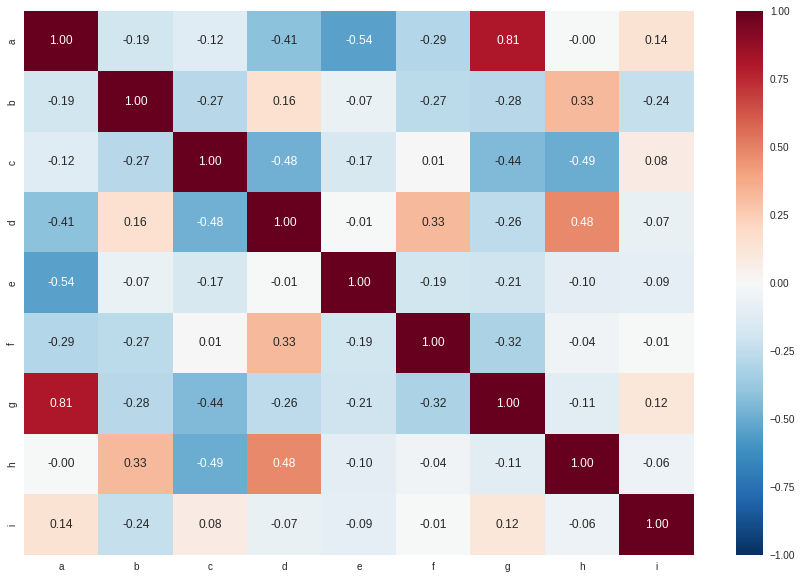

In [19]:
# Pearson Table
fig, ax = plt.subplots(figsize=(15, 10))
ax = heatmap(data.corr(),fmt=".2f",annot=True,ax=ax,cmap="RdBu_r",vmin=-1,vmax=1,)

based on pearson table, some additive have positive correlation and some additive have slightly zero correlation. **that's mean there is some kind of difference by adding varying level of additive in formulation** for example : **additive A have strong positive correlation with additive G**

**ANOVA TESTING**

**The Anova test** works to **compare population averages to find out the significant differences between two or more data groups**

**Assumtion**<br>
* **Fail to Reject H0**: All sample distributions are equal.
* **Reject H0**: One or more sample distributions are not equal.

In [20]:
# ANOVA TEST
stat, p = f_oneway(data['a'], data['b'], data['c'], data['d'] , data['e'] , data['f'], data['g'], data['h'], data['i'])
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0) P values is greater than Alpha')
else:
	print('Different distributions (reject H0) P values is less than Alpha')

Statistics = 168331.969, p = 0.000
Different distributions (reject H0) P values is less than Alpha


#### **1. Non - Parametric Testing (Mann-Whitney U Test)**

**The Mann-Whitney U test is a nonparametric statistical significance test** for determining whether two **independent samples were drawn from a population with the same distribution**.

**Assumtion**<br>
* **Fail to Reject H0**: All sample distributions are equal.
* **Reject H0**: One or more sample distributions are not equal.

In [21]:
# Mann-Whitney U Test
stat, p = mannwhitneyu(data['a'], data['g'])
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0) P values is greater than Alpha')
else:
	print('Different distributions (reject H0) P values is less than Alpha')

Statistics = 0.000, p = 0.000
Different distributions (reject H0) P values is less than Alpha


### **Histogram Plot and Distribution Study**

**A histogram is an approximate representation of the distribution of numerical data**

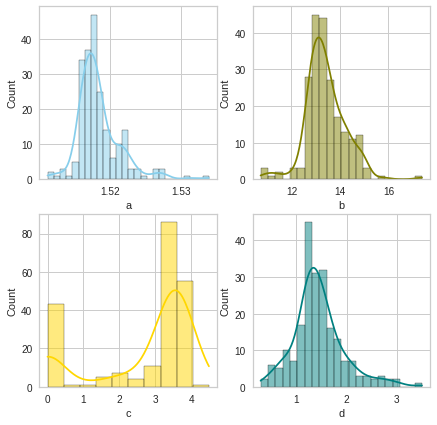

In [22]:
# Histogram Analysis
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=data, x="a", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data, x="b", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="c", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data, x="d", kde=True, color="teal", ax=axs[1, 1])
plt.show()

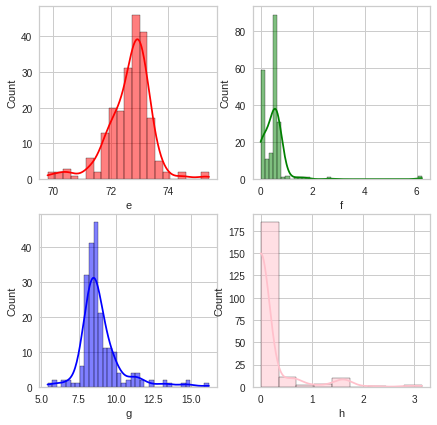

In [23]:
# Histogram analysis
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=data, x="e", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=data, x="f", kde=True, color="green", ax=axs[0, 1])
sns.histplot(data=data, x="g", kde=True, color="blue", ax=axs[1, 0])
sns.histplot(data=data, x="h", kde=True, color="pink", ax=axs[1, 1])
plt.show()

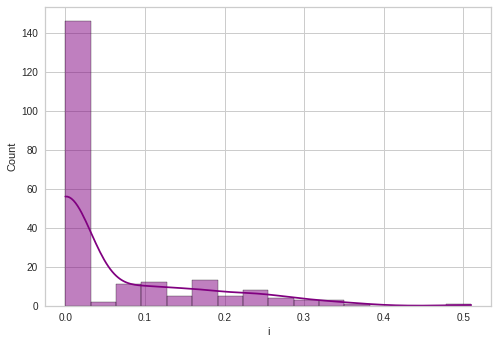

In [24]:
# Histogram Analysis
sns.histplot(data=data, x="i", kde=True, color="purple")
plt.show()

**Conclution : From Every waveform in histogram we have insight that data we use doesn't come from normal distribution but if we look back from costumer problem that we must prove that every additive in formulation is significantly different, the answer is yes. it's prove by correlation and ANOVA testing**

### **Clustering Approach**

In [43]:
# Model Construction
exp_clu101 = setup(data, normalize = True,
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(135, 9)"
2,Missing Values,False
3,Numeric Features,9
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(135, 9)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='UNSUPERVIS

In [44]:
# Model Options
models()

INFO:logs:gpu_param set to False


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [57]:
cls_models = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3158,42.9704,0.9738,0,0,0


INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 6
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [58]:
print(cls_models)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [59]:
kmean_results = assign_model(cls_models)
kmean_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(135, 10)
INFO:logs:assign_model() succesfully completed......................................


,a,b,c,d,e,f,g,h,i,Cluster
0,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,Cluster 1
1,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,Cluster 2
2,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,Cluster 0
3,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00,Cluster 0
4,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,Cluster 1


In [60]:
# plot model
plot_model(cls_models)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


**We use elbow distortion score method to determine what is the best number of cluster, and we find that 5 is the best number of cluster**

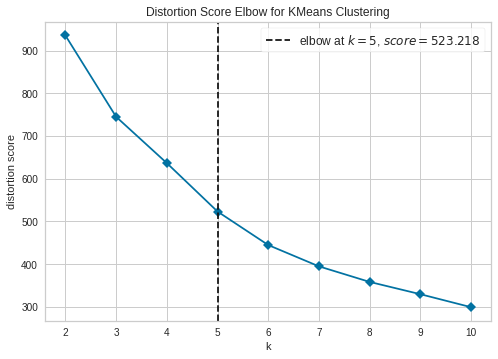

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [61]:
# Elbow Evaluation
plot_model(cls_models, plot = 'elbow')

**Average Silhouette Evaluation Score is 0.31 which means every single sample in each cluster is near decision boundaries**

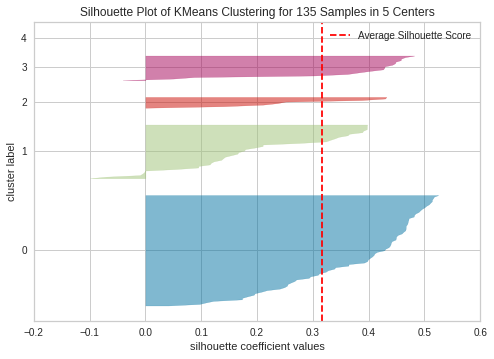

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [62]:
# silhouette evaluation
plot_model(cls_models, plot = 'silhouette')

In [63]:
# Distribution plot
plot_model(cls_models, plot = 'distribution')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


**from this plot, we can indentify that cluster 0 have the most sample compared to other clusters. and we can indentify what is value composition of each variable for every clusters**

In [66]:
plot_model(cls_models, plot = 'distribution', feature = 'a')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [67]:
plot_model(cls_models, plot = 'distribution', feature = 'b')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
